In [1]:
#import ....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline
food = pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0, low_memory=False)
normalised_food = pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0, low_memory=False) #For normalisation

In [2]:
#Display first 5 rows for visualisation
#food.head()

In [3]:
#Question 1
print("***")
print("Q1")
print("Number of foods: " + str(food.shape[0])) 
print("Number of attributes: " + str(food.shape[1]) + "\n")
print(food.dtypes)
print("***")

***
Q1
Number of foods: 5740
Number of attributes: 57

Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre (

In [4]:
#Question 2
print("***")
print("Q2")
median_Magnesium = food["Magnesium (Mg) (mg)"].median()
print("Median value of Magnesium: %.1f" %median_Magnesium)
mean_Moisture = food["Moisture (g)"].mean()
print("Mean value of Moisture: %.1f" %mean_Moisture)
print("***")

***
Q2
Median value of Magnesium: 22.0
Mean value of Moisture: 56.3
***


In [5]:
#Question 3

# Part a
food = food.astype({"Survey ID": "str"})

#DEBUG
#print(food.dtypes)

# Part b
food['Food category'] = food['Survey ID'].str.slice(0, 2, 1)

#DEBUG
#food.head()


# Part c
total_number = food.shape[0]
number_of_cat13 = food[food['Food category'] == '13'].shape[0]
percentage = round((number_of_cat13/total_number) * 100, 1)
print("***")
print("Q3")
print("% of foods which are Cereal based products and dishes (Food category 13) = " + str(percentage))
print("***")


***
Q3
% of foods which are Cereal based products and dishes (Food category 13) = 15.9
***


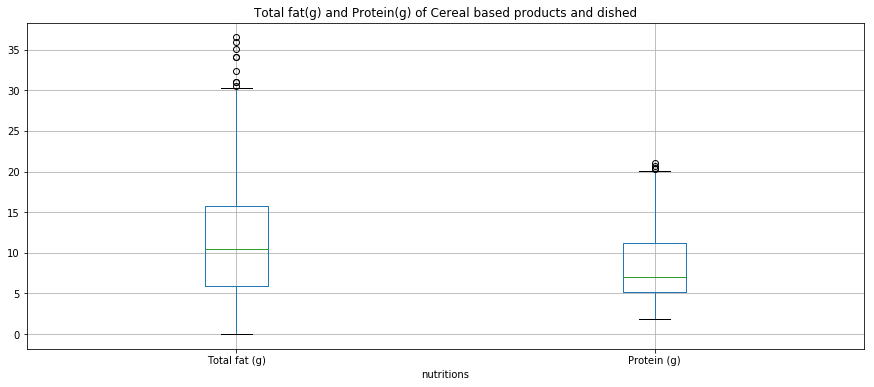

In [6]:
#Question 4
#A plot that consists two boxplots
#First boxplot to show the distribution of Total fat(g) within foods that are "Cereal based products and dished"
#Second boxplot to show the distribution of Protein(g) within foods that are "Cereal based products and dishes"

#All the cereal based products and dishes
cereal_based = food[food['Food category'] == '13']

#boxplot
ax = cereal_based.loc[:, ['Total fat (g)', 'Protein (g)']].plot(kind = 'box', grid = True, figsize = (15, 6))
plt.xlabel('nutritions')
plt.title('Total fat(g) and Protein(g) of Cereal based products and dished')
plt.show()





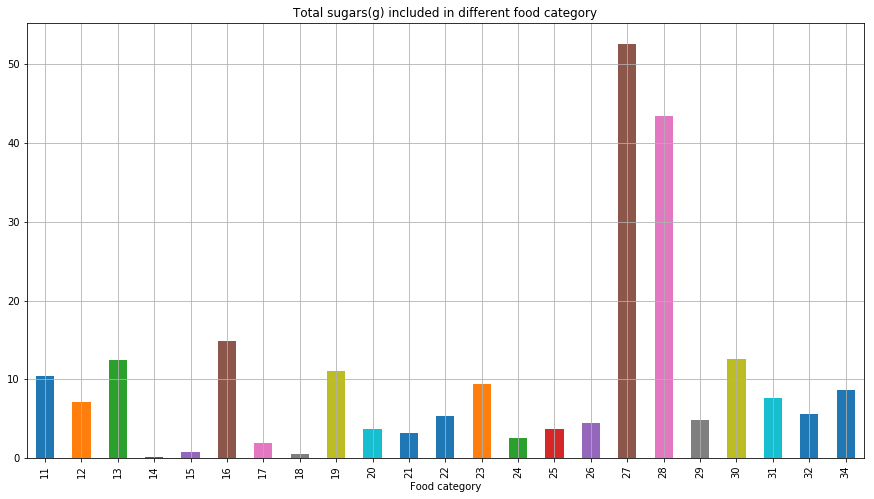

In [7]:
#Question 5
grouped = food.groupby('Food category')

#The mean value from only 'Total sugars (g)' column
mean_grouped = grouped.mean()['Total sugars (g)']

#Plot the bar chart
mean_grouped.plot(kind = 'bar', x = mean_grouped.index, y = 'Total sugars (g)', figsize = (15,8), grid = True)
plt.title('Total sugars(g) included in different food category')
plt.show()


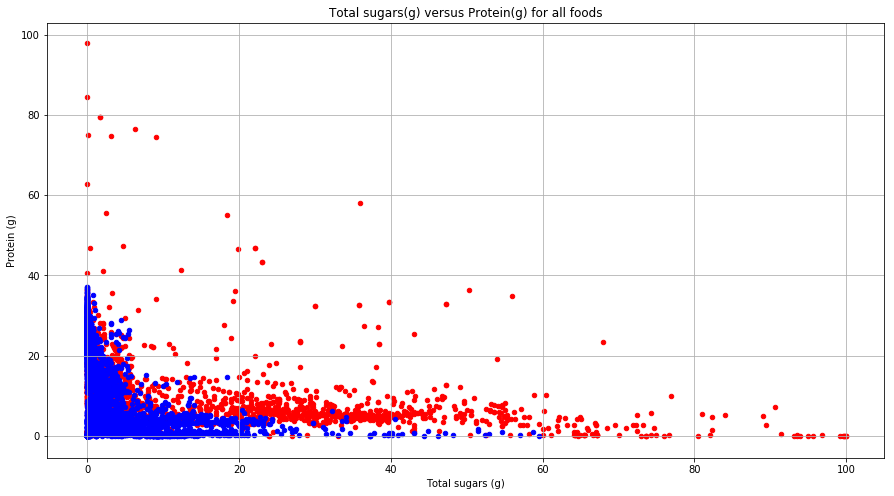

In [8]:
#Question 6

#Part a

food['EnergyLevel'] = food['Energy, with dietary fibre (kJ)'] > 1000
#Convert Boolean datatype to Int
food['EnergyLevel'] = food['EnergyLevel'].astype(int)


#Part b

#Retrieve the rows with EnergyLevel is equal to 1
high_energy_level = food.loc[food['EnergyLevel'] == 1]

#Retrieve the rows with EnergyLevel is equal to 0
low_energy_level = food.loc[food['EnergyLevel'] == 0]

#plot the food with "High" energy to red, and specify target ax
ax = high_energy_level.plot.scatter(x = 'Total sugars (g)', y = 'Protein (g)', c = 'red', legend = 'High', \
                                    figsize = (15, 8), )

#plot the food with "low" energy to blue
low_energy_level.plot.scatter(x = 'Total sugars (g)', y = 'Protein (g)', c = 'blue', legend = 'Low', ax = ax,\
                              grid = True)


plt.title('Total sugars(g) versus Protein(g) for all foods')
plt.show()



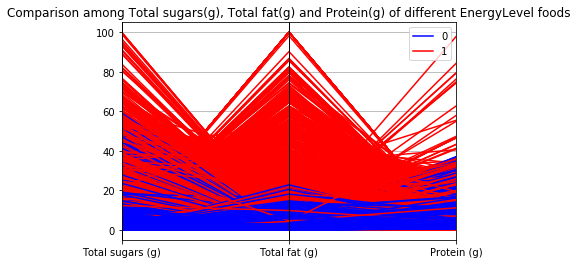

In [15]:
#Question 7

#Part a
#Formula for normalising
def nomalise(oldvalue, min, max):
    return (oldvalue-min)/(max-min)

#Some values for calculation
min_protein = food['Protein (g)'].min()
max_protein = food['Protein (g)'].max() 
min_fat = food['Total fat (g)'].min()
max_fat = food['Total fat (g)'].max()
min_sugars = food['Total sugars (g)'].min()
max_sugars = food['Total sugars (g)'].max()

#Normalising the attributes
normalised_food['Protein (g)'] = nomalise(food['Protein (g)'], min_protein, max_protein)
normalised_food['Total fat (g)'] = nomalise(food['Total fat (g)'], min_fat, max_fat)
normalised_food['Total sugars (g)'] = nomalise(food['Total sugars (g)'], min_sugars, max_sugars)

#DEBUG
#food[['Total sugars (g)', 'Total fat (g)', 'Total sugars (g)']]

#Part b
parallel_coordinates(food[['Total sugars (g)', 'Total fat (g)', 'Protein (g)', 'EnergyLevel']], 'EnergyLevel',\
                     color = ['b', 'r'])

plt.title('Comparison among Total sugars(g), Total fat(g) and Protein(g) of different EnergyLevel foods')
plt.show()




***
Q8

1. Dripping, beef 900.8
2. Fat, solid, vegetable oil based 900.8
3. Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans) 900.8
4. Lard 900.8
5. Ghee, clarified butter 900.3
***


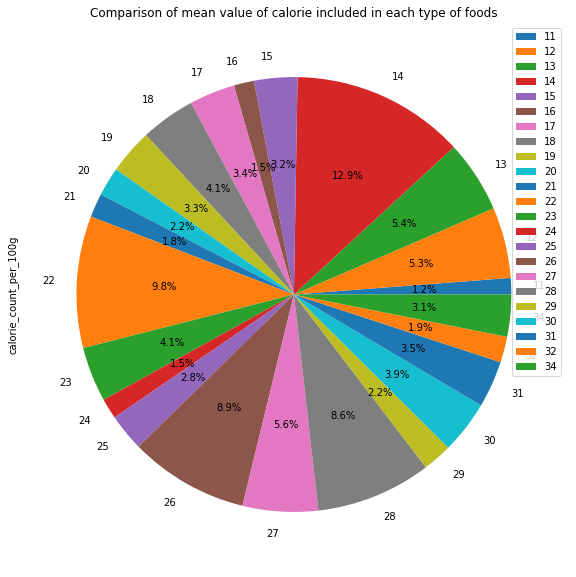

In [18]:
#Question 8


#Part a
food['calorie_count_per_100g'] = 4 * food['Protein (g)'] + \
                                 4 * food['Available carbohydrates, with sugar alcohols (g)']\
                                 + 9 * food['Total fat (g)'] + 7 * food['Alcohol (g)']



#Part b
print('***')
print('Q8\n')

food_sorted_by_calorie = food.sort_values(by = 'calorie_count_per_100g', ascending = False)

#DEBUG
#print(food_sorted_by_calorie.head())

#Note that 'Food Name' is the third attribute, whose index is 2
#And 'calorie_count_per_100g' is the last attribute, whose index is -1
#Print out top 5 foods with the highest calorie_count_per_100g
for i in range(5):
    print(str(i+1) + '. ' + str(food_sorted_by_calorie.iloc[i, 2]) + ' %.1f' %food_sorted_by_calorie.iloc[i, -1])
    i += 1
print('***')



#Part c
grouped = food.groupby('Food category')

#The mean value from only 'calorie_count_per_100g' column
mean_grouped = grouped.mean()['calorie_count_per_100g']
labels = mean_grouped.index

pie = mean_grouped.plot.pie(y = 'calorie_count_per_100g', figsize=(15, 10), autopct='%1.1f%%')
plt.legend(labels)
plt.title('Comparison of mean value of calorie included in each type of foods')
plt.show()



In [ ]:
#Question 9

#Part a



#Part b


